<a href="https://colab.research.google.com/github/Sanjayzzz/Code_Zen/blob/main/Rice_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rice Price Prediction**

## **Load & Preprocess Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Once uploaded, the file will be in the current working directory
import pandas as pd

# Load the CSV file (use the correct filename after upload)df = df.fillna(df.mean())  # Replace missing values with column means

df = pd.read_csv('sample_rice_price_data.csv')

# Display the first 5 rows
print(df.head())


Saving sample_rice_price_data.csv to sample_rice_price_data.csv
   rainfall  temperature  radiation  exchange_rate  yield  rice_price
0       152    28.951502  20.309346     190.738994   2515   90.269433
1       229    34.266589  19.477832     199.411195   4839   83.383384
2       142    32.272720  20.528931     194.907475   2335   87.772791
3        64    28.265408  20.926967     195.787659   3782   84.897385
4       156    30.704440  15.808533     213.768526   4305   83.852035


In [ ]:
df = df.fillna(df.mean())  # Replace missing values with column means


In [ ]:
df


,rainfall,temperature,radiation,exchange_rate,yield,rice_price
0,152,28.951502,20.309346,190.738994,2515,90.269433
1,229,34.266589,19.477832,199.411195,4839,83.383384
2,142,32.272720,20.528931,194.907475,2335,87.772791
3,64,28.265408,20.926967,195.787659,3782,84.897385
4,156,30.704440,15.808533,213.768526,4305,83.852035
...,...,...,...,...,...,...
95,240,29.110370,20.722925,190.435745,4982,80.753020
96,195,25.330507,24.803316,180.612182,4445,74.742321
97,267,28.450712,15.753463,217.337452,2633,86.574418
98,93,31.343513,18.056970,200.041595,3156,85.323607


***Handle Missing Values***

In [3]:
df = df.fillna(df.mean())  # Replace missing values with column means


## **`Feature Selection`**

In [4]:
X = df[['rainfall', 'temperature', 'radiation', 'exchange_rate', 'yield']]  # Example features
y = df['rice_price']  # Target variable


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Split Dataset for Training & Testing**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Linear Regression** 📌

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# ***Random Forest Regression*** 📌

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


**Model Evaluation**

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R² Score: {r2_score(y_true, y_pred)}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")



Linear Regression Performance:
Mean Absolute Error (MAE): 1.870437300981085
Mean Squared Error (MSE): 5.005640221805111
Root Mean Squared Error (RMSE): 2.2373288139665815
R² Score: 0.5496659842495915

Random Forest Regression Performance:
Mean Absolute Error (MAE): 1.7902647572350012
Mean Squared Error (MSE): 4.697548302532048
Root Mean Squared Error (RMSE): 2.1673828232529777
R² Score: 0.5773835718265221


# **Visualize Predictions**

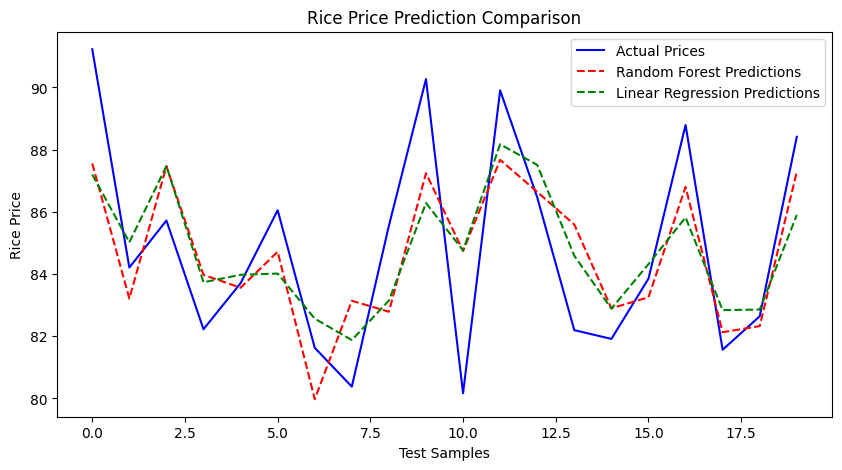

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_pred_rf, label="Random Forest Predictions", color='red', linestyle="dashed")
plt.plot(y_pred_lr, label="Linear Regression Predictions", color='green', linestyle="dashed")
plt.legend()
plt.title("Rice Price Prediction Comparison")
plt.xlabel("Test Samples")
plt.ylabel("Rice Price")
plt.show()
